In [37]:
import numpy as np
import cv2
from PIL import *
from matplotlib import pyplot as plt
import math
from scipy import signal # for convolution
import matplotlib.image as mpimg

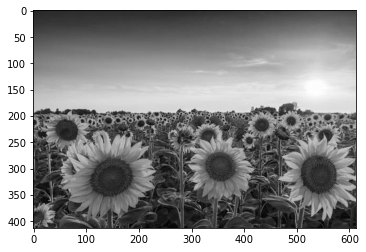

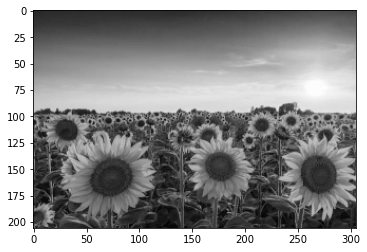

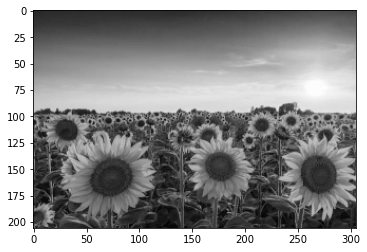

In [42]:
def getWH(img, scale):
    scale_percent = scale # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    return dim
    
flower = cv2.imread("sunflower.jpg", 0)
plt.imshow(flower, cmap="gray")
plt.show()

dim = getWH(flower, 50)
re2 = cv2.resize(flower, dim, interpolation = cv2.INTER_AREA)
plt.imshow(re1, cmap="gray")
plt.show()

dim = getWH(re1, 50)
re3 = cv2.resize(re1, dim, interpolation = cv2.INTER_AREA)
plt.imshow(re2, cmap="gray")
plt.show()

In [19]:
def calculate_filter_size(sigma = 0.5, T = 0.3):
    sHalf = np.round(np.sqrt(-np.log(T)*2*sigma**2)) # size of half mask
    N=2*sHalf+1 #size of mask
    return (sHalf, N)

def gaussian_mask_k(k=1.411, sigma = 0.5, T = 0.3):
    size = calculate_filter_size(sigma, T)
    sHalf = size[0]
    N = size[1]
    [Y, X] = np.meshgrid(np.arange(-sHalf,sHalf+1), np.arange(-sHalf,sHalf+1))
    G = np.exp(-(X**2 + Y**2)/(2*k*sigma**2)) # The value of Gaussian
    return G

In [43]:
def octave(img, k=np.sqrt(2), s=1.6):
    k = np.sqrt(2) 
    sigma = s
    gs = []
    ss = [img]
    for i in range(4):
        gs.append(gaussian_mask_k(k**i, sigma))
        ss.append(signal.convolve2d(ss[i], gs[i], "same"))
    return ss
        
def calculate_DOG(ss):
    dog =[]
    for i in range(len(ss)-1):
        dog.append(ss[i+1]-ss[i])
    return dog

ss = octave(flower)
dog1 = calculate_DOG(ss)

for i,img in enumerate(ss):
    plt.imsave('ss1_'+str(i)+'.png', img, cmap='gray')
    
for i, img in enumerate(dog1):
    plt.imsave('dog1_'+str(i)+'.png', img, cmap='gray')

In [44]:
ss2 = octave(re2)
dog2 = calculate_DOG(ss2)

for i,img in enumerate(ss2):
    plt.imsave('ss2_'+str(i)+'.png', img, cmap='gray')
    
for i, img in enumerate(dog2):
    plt.imsave('dog2_'+str(i)+'.png', img, cmap='gray')

In [45]:
ss3 = octave(re3)
dog3 = calculate_DOG(ss3)

for i,img in enumerate(ss3):
    plt.imsave('ss3_'+str(i)+'.png', img, cmap='gray')
    
for i, img in enumerate(dog3):
    plt.imsave('dog3_'+str(i)+'.png', img, cmap='gray')